In [19]:
#Reading files

import numpy as np

r_cols=['user_id', 'item_id', 'rating', 'timestamp']
data_df = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url','unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item_df = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols,
                     encoding='latin-1')

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1', parse_dates=True) 

g_cols=['genre','genre_id']
genre_df=pd.read_csv('ml-100k/u.genre', sep='|', names=g_cols,
                     encoding='latin-1')

o_cols=['occupation']
occupation_df=pd.read_csv('ml-100k/u.occupation', sep='|', names=o_cols,
                     encoding='latin-1')




In [20]:
#Basic Summary statistics of data file (Ratings file)

data_df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [21]:
#Check if the data file (Ratings file) has Null values
data_df.isnull().any()

user_id      False
item_id      False
rating       False
timestamp    False
dtype: bool

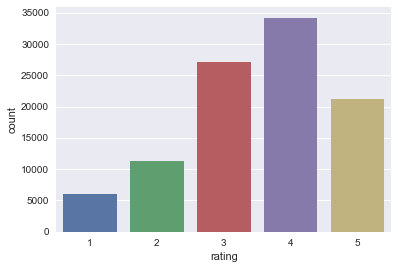

In [22]:
#Rating vs count

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=data_df.rating,data=data_df)
plt.show()

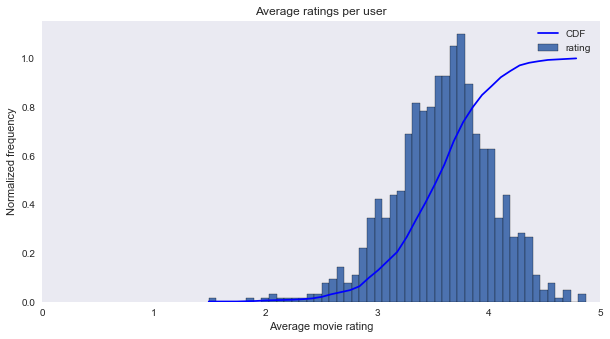

In [23]:
#Average ratings per user

import numpy as np


dftmp = data_df[['user_id','rating']].groupby('user_id').mean()
# Plot histogram
dftmp.plot(kind='hist', bins=50, grid=0, normed=True, edgecolor='black', figsize=(10,5))
# Plot cumulative function on top (couldn't do any other way)
# evaluate the histogram
values, base = np.histogram(dftmp, bins=40, normed=True)
# evaluate the cumulative (multiply by the average distance between points in the x-axis to get UNIT area)
cumulative = np.cumsum(values) * np.diff(base).mean()
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue', label='CDF')
plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()




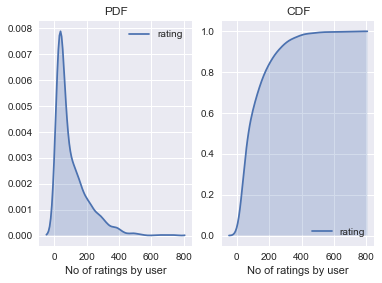

In [24]:
#Number of Movies rated by an user

no_of_rated_movies_per_user = data_df.groupby(by='user_id')['rating'].count().sort_values(ascending=False)


ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()



In [25]:
#Basic statistics on Number of times an user has rated movies

ratings_count=data_df.groupby('user_id').size().reset_index(name='counts')


counts=[]
for i in range(0,len(ratings_count)):
    counts.append(ratings_count['counts'][i])

print("Minimum number of times an user has rated movies:",min(counts))
print("Maximum number of times an user has rated movies:",max(counts))
print("Average number of times an user has rated movies:",np.mean(counts))
print("Average number of times an user has rated movies:",np.median(counts))
print("Standard deviation:", np.std(counts))


Minimum number of times an user has rated movies: 20
Maximum number of times an user has rated movies: 737
Average number of times an user has rated movies: 106.044538706
Average number of times an user has rated movies: 65.0
Standard deviation: 100.878212271


In [26]:
#Basic statistics of item file(Movie file)

item_df.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#Check if item file (Movie file) has NULL value

item_df.isnull().any()

movie_id              False
movie_title           False
release_date           True
video_release_date     True
imdb_url               True
unknown               False
Action                False
Adventure             False
Animation             False
Children's            False
Comedy                False
Crime                 False
Documentary           False
Drama                 False
Fantasy               False
Film-Noir             False
Horror                False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Thriller              False
War                   False
Western               False
dtype: bool

In [29]:
#Compute the movie count per genre

l=genre_df['genre'].tolist()
ll=[[i,item_df[i].sum()] for i in l]
print(ll)

[['unknown', 2], ['Action', 251], ['Adventure', 135], ['Animation', 42], ["Children's", 122], ['Comedy', 505], ['Crime', 109], ['Documentary', 50], ['Drama', 725], ['Fantasy', 22], ['Film-Noir', 24], ['Horror', 92], ['Musical', 56], ['Mystery', 61], ['Romance', 247], ['Sci-Fi', 101], ['Thriller', 251], ['War', 71], ['Western', 27]]


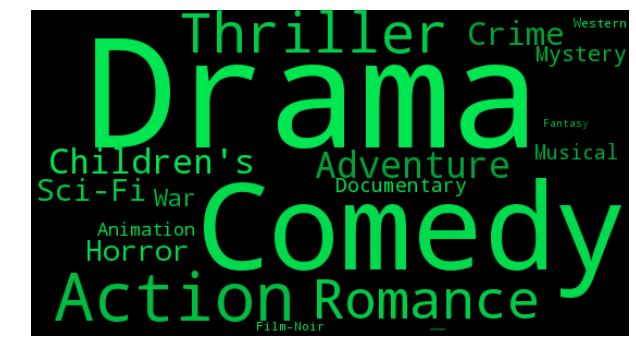

In [12]:
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud


# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = ll[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

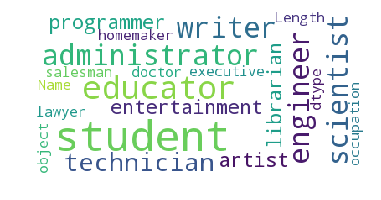

In [34]:
#Word cloud for Each genre movies

import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)


# wordcloud = WordCloud(
#                          ).generate(str(tags_df['tag']))

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(user_df['occupation']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()






In [30]:
#Basic statistics of User file

user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [31]:
#Check if User file has any NULL value

user_df.isnull().any()

user_id       False
age           False
gender        False
occupation    False
zip_code      False
dtype: bool

In [15]:
user_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


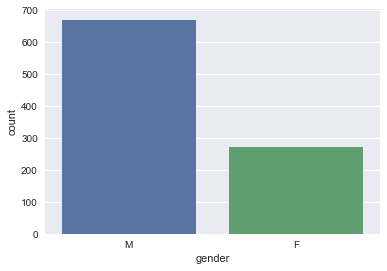

In [32]:
#Male vs Female users count

sns.countplot(x=user_df.gender,data=user_df)
plt.show()

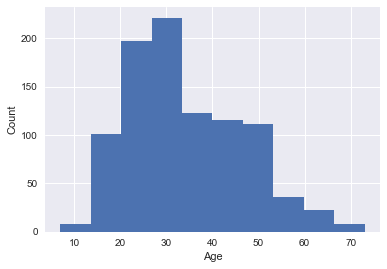

In [33]:
#Users' age vs Count

plt.hist(user_df.age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()